Filament2D Tutorial
===========

This tutorial demonstrates the usage of the `FilFinder2D` object to perform the analysis on an individual filament. The general tutorial for FilFinder can be found [here](http://fil-finder.readthedocs.io/en/latest/tutorial.html).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import astropy.units as u

# Optional settings for the plots. Comment out if needed.
import seaborn as sb
sb.set_context('poster')

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12., 9.6)

The general tutorial demonstrates how the `Filament2D` objects interact with `FilFinder2D`. To generate an example, we will use a straight Gaussian filament to demonstrate how the FilFinder analysis can be run on individual filaments. We can also create a simplified mask by simply thresholding the image.

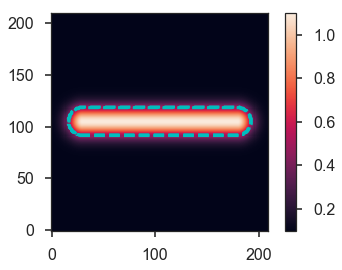

In [2]:
from fil_finder import FilFinder2D, Filament2D
from fil_finder.tests.testing_utils import generate_filament_model

mod = generate_filament_model(return_hdu=True, pad_size=30, shape=150,
                                  width=10., background=0.1)[0]

# Create a simple filament mask
mask = mod.data > 0.5

plt.imshow(mod.data, origin='lower')
plt.colorbar()
plt.contour(mask, colors='c', linestyles='--')

The simple filament model is shown above, with the mask highlighted by the dashed contour.

The first step is to run the first few steps on the FilFinder algorithm with `FilFinder2D`:

In [3]:
filfind = FilFinder2D(mod, distance=250 * u.pc, mask=mask)
filfind.preprocess_image(flatten_percent=85)

filfind.create_mask(border_masking=True, verbose=False,
                    use_existing_mask=True)
filfind.medskel(verbose=False)
filfind.analyze_skeletons()

/home/eric/Dropbox/code_development/filaments/build/lib.linux-x86_64-3.6/fil_finder/filfinder2D.py:288: UserWarning: Using inputted mask. Skipping creation of anew mask.
  warnings.warn("Using inputted mask. Skipping creation of a"


The `Filament2D` objects are created when running `FilFinder2D.analyze_skeleton`. From here, we will focus on the filament object:

In [4]:
fil = filfind.filaments[0]

The `Filament2D` object contains a minimized version of the FilFinder algorithm. Most of the `FilFinder2D` functionality simply loops throught the `Filament2D` objects. However, `Filament2D` object do not keep a copy of the data and are designed to carry a minimal amount of information.

Though not shown here, the only requirement to create a `Filament2D` object is a set of pixels that define the skeleton shape. These are contained in:

In [5]:
fil.pixel_coords

(array([105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105,
        105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105,
        105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105,
        105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105,
        105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105,
        105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105,
        105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105,
        105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105,
        105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105,
        105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105,
        105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105,
        105, 105, 105, 105, 105, 105, 105]),
 array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
      

These pixel coordinates are the positions in the original image. When the skeleton array is generated, the minimal shape is returned:

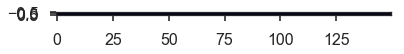

In [6]:
plt.imshow(fil.skeleton())

For a straight skeleton in this case, this returns a 1-pixel wide array in 0th dimension. This array can be padded:

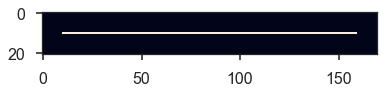

In [7]:
plt.imshow(fil.skeleton(pad_size=10))

The position of the filament is defined as the median pixel location based on the set of skeleton pixels:

In [8]:
fil.position()

[<Quantity 105. pix>, <Quantity 104.5 pix>]

If WCS information is given for the object, the centre can also be returned in world coordinates:

In [9]:
fil.position(world_coord=True)

[<Quantity 359.99770817 deg>, <Quantity 0.00114592 deg>]

The skeleton analysis, equivalent to `FilFinder2D.analyze_skeletons` is `Filament2D.skeleton_analysis`. However, there are additional arguments that must be passed since the `Filament2D` object does not contain a copy of the image. To reproduce the `fil.analyze_skeletons` call from above, we can run:

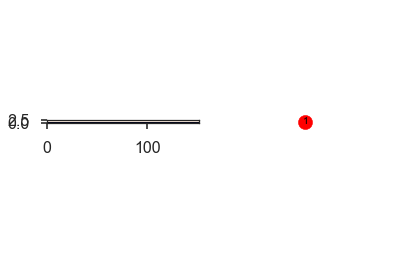

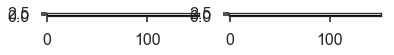

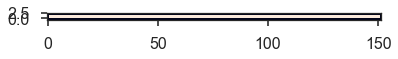

In [10]:
fil.skeleton_analysis(filfind.image, verbose=True)

The same keyword and plot output is shown as described in the [FilFinder2D tutorial](http://fil-finder.readthedocs.io/en/latest/tutorial.html).

The networkx graph can be accessed from `fil.graph` and can be plotted:

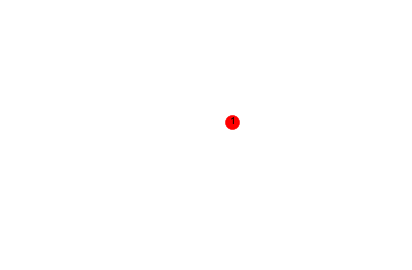

In [11]:
fil.plot_graph()

Filaments with multiple branches have more interesting looking graphs.

The lengths and branch properties are now defined:

In [12]:
fil.length()

<Quantity 149. pix>

In [13]:
fil.branch_properties.keys()

dict_keys(['length', 'intensity', 'number', 'pixels'])

The longest path skeleton is now defined as well. The skeleton array of the longest path can be returned with:

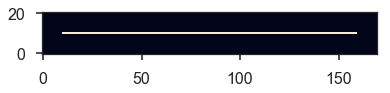

In [14]:
plt.imshow(fil.skeleton(out_type='longpath', pad_size=10), origin='lower')

Orientation and Curvature
-----------------------------

The RHT analysis on the longest path is run with:

In [15]:
fil.rht_analysis()
print(fil.orientation, fil.curvature)

1.5707963267948966 rad 0.26411662612097775 rad


The RHT distribution can be plotted with:

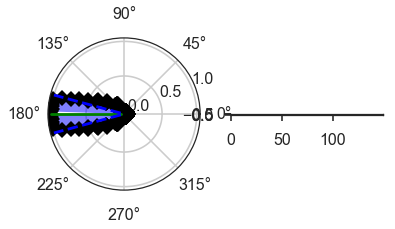

In [16]:
fil.plot_rht_distrib()

And the distribution can be accessed with `Filament2D.orientation_hist`, which contains the bins and the distribution values.

To run on individual branches, use:

In [17]:
fil.rht_branch_analysis()
print(fil.orientation_branches, fil.curvature_branches)

[1.57079633] rad [0.26411663] rad


The properties of branches can be returned with:

In [18]:
fil.branch_table()

length,intensity
pix,
float64,float64
149.0,1.0999999999999996


And with the orientation and curvature branch information:

In [19]:
fil.branch_table(include_rht=True)

length,intensity,orientation,curvature
pix,,rad,rad
float64,float64,float64,float64
149.0,1.0999999999999996,1.5707963267948966,0.26411662612097775


Radial Profiles and Widths
------------------------------

The radial profiles and width analysis is run with `Filament2D.width_analysis`. Most of the inputs are the same as those for `FilFinder2D.find_widths`, with a few key differences:

* The image must be given.
* The total skeleton array must also be given, since each `Filament2D` is unaware of other filaments.
* The beam width must be given for the FWHM to be deconvolved.

To reproduce the `FilFinder2D` analysis:

In [20]:
fil.width_analysis(filfind.image, all_skeleton_array=filfind.skeleton, beamwidth=filfind.beamwidth,
                   max_dist=0.3 * u.pc)

The radial profile is contained in `fil.radprofile` and can be plotted with:

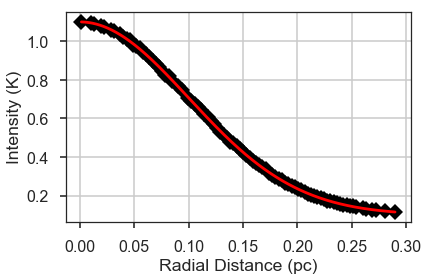

In [21]:
fil.plot_radial_profile(xunit=u.pc)

The parameters, uncertainty, model type, and check for fit quality are contained in:

In [22]:
print(fil.radprof_parnames)
print(fil.radprof_params)
print(fil.radprof_errors)
print(fil.radprof_type)
print(fil.radprof_fit_fail_flag)

['amplitude_0', 'stddev_0', 'amplitude_1']
[<Quantity 1.00078556>, <Quantity 9.99775856>, <Quantity 0.09998652>]
[<Quantity 0.00189642>, <Quantity 0.0165278>, <Quantity 0.00059495>]
gaussian_bkg
False


The (possibly) deconvolved FWHM is:

In [23]:
fil.radprof_fwhm(u.pc)

(<Quantity 0.23351 pc>, <Quantity 0.0003924 pc>)

The first element is the FWHM and the second is the error.

Note that the fit has correctly recovered the model parameters set at the beginning.

An astropy table can be returned with the complete fit results:

In [24]:
fil.radprof_fit_table(unit=u.pc)

amplitude_0,amplitude_0_err,stddev_0,stddev_0_err,amplitude_1,amplitude_1_err,fwhm,fwhm_err,fail_flag,model_type
,,,,,,pc,pc,,
float64,float64,float64,float64,float64,float64,float64,float64,bool,str12
1.0007855625803985,0.0018964160055463767,9.99775856017537,0.01652780418619165,0.09998652036316304,0.0005949451821499358,0.2335099973611502,0.00039239889215719536,False,gaussian_bkg


And finally the fit model itself can be accessed with:

In [25]:
fil.radprof_model

<CompoundModel1(amplitude_0=1.00078556, mean_0=0., stddev_0=9.99775856, amplitude_1=0.09998652)>

The radial profile can be returned as an astropy table with `fil.radprof_table(xunit=u.pc)`.

Other Outputs
---------------

The total intensity of the filament within the FWHM is:

In [26]:
fil.total_intensity()

<Quantity 3497.86892972 K>

And with the fitted background removed:

In [27]:
fil.total_intensity(bkg_subtract=True)

<Quantity 3112.3209072 K>

The model image from the radial profile fit:

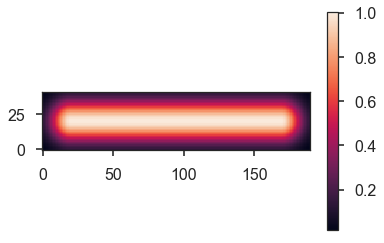

In [28]:
plt.imshow(fil.model_image(), origin='lower')
plt.colorbar()

By default, the background level is subtraced. Without the subtraction:

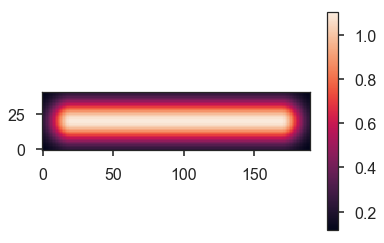

In [29]:
plt.imshow(fil.model_image(bkg_subtract=False), origin='lower')
plt.colorbar()

The median along the skeleton:

In [30]:
fil.median_brightness(filfind.image)

1.1

This is consistent with the max of the model image:

In [31]:
filfind.image.max()

<Quantity 1.1 K>

The profile along the longest path skeleton:

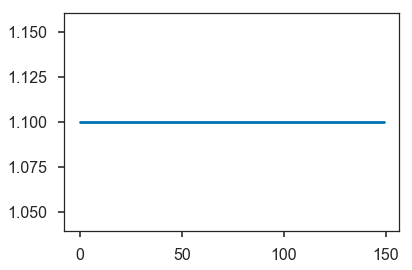

In [32]:
plt.plot(fil.ridge_profile(filfind.image))

In this case, the ridge is constant in the model.

One feature that is not included in `FilFinder2D` is `Filament2D.profile_analysis`, which creates a set of profiles perpendicular to the longest path skeleton. This is useful for measuring filament properties as a function of position, rather than creating a single radial profile:

Text(0.5,0,'Distance from skeleton (pc)')

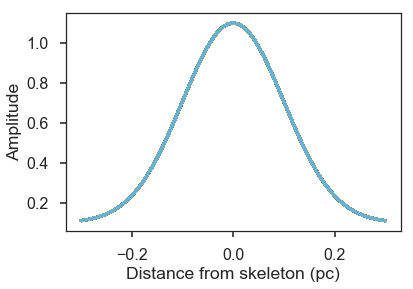

In [33]:
profs = fil.profile_analysis(filfind.image, xunit=u.pc, max_dist=30 * u.pix)
for dist, prof in zip(profs[0], profs[1]):
    plt.plot(dist, prof)
plt.ylabel("Amplitude")
plt.xlabel("Distance from skeleton (pc)")

Plotted here are all of the radial profiles. For this model, however, they are all the same. Fitting of the radial profiles is not included in `Filament2D` due to the complexity that some radial slices can show in real filaments. See a dedicated package for this type of analysis, such as [radfil](https://github.com/catherinezucker/radfil).

Saving the Output
--------------------

A FITS file can be saved with a stamp of the image, skeleton, longest path skeleton, and the filament model:

In [34]:
fil.save_fits("filament_stamp.fits", filfind.image)

Saving a `Filament2D` object
--------------------------------

The object can be saved and loaded as a pickle file:

In [35]:
fil.to_pickle('filament.pkl')

In [36]:
loaded_fil = Filament2D.from_pickle('filament.pkl')
loaded_fil.length()

<Quantity 149. pix>